<a href="https://colab.research.google.com/github/brrikcy/deep-learning/blob/main/variational%20auto%20encoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K

In [ ]:
# Define the latent dimension (number of latent variables)
latent_dim = 2

In [ ]:
# Define the encoder network
from tensorflow.keras.layers import Input, Dense
inputs = Input(shape=(784,)) # Assuming 784-dimensional input
x = Dense(256, activation='relu')(inputs)
x = Dense(128, activation='relu')(x)

In [ ]:
# Mean and variance layers
z_mean = Dense(latent_dim)(x)
z_log_var = Dense(latent_dim)(x)

In [ ]:
# Sampling layer (reparameterization trick)
def sampling(args):
 z_mean, z_log_var = args
 epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim))
 return z_mean + K.exp(z_log_var / 2) * epsilon
z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

In [ ]:
# Encoder model
encoder = Model(inputs, [z_mean, z_log_var, z])
# Define the decoder network
latent_inputs = Input(shape=(latent_dim,))
x = Dense(128, activation='relu')(latent_inputs)
x = Dense(256, activation='relu')(x)
outputs = Dense(784, activation='sigmoid')(x) # Output layer for reconstructing input images
encoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 784)            │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 256)            │        200,960 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 128)            │         32,896 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 2)              │            258 │ dense_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 2)              │            258 │ dense_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lambda (Lambda)           │ (None, 2)              │              0 │ dense_2[0][0],         │
│                           │                        │                │ dense_3[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 234,372 (915.52 KB)

 Trainable params: 234,372 (915.52 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Decoder model
decoder = Model(latent_inputs, outputs)
# VAE model (combining enchttps://drive.google.com/drive/search?q=owner%3Ame%20(type%3Aapplication%2Fvnd.google.colaboratory%20%7C%7C%20type%3Aapplication%2Fvnd.google.colab)&authuser=0oder and decoder)
inputs = Input(shape=(784,))
z_mean, z_log_var, z = encoder(inputs)
outputs = decoder(z)
decoder.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 2)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 784)                 │         201,488 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 234,896 (917.56 KB)

 Trainable params: 234,896 (917.56 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Loss function (reconstruction loss + KL divergence)
def vae_loss(x, x_decoded_mean):
 reconstruction_loss = K.mean(K.square(x - x_decoded_mean), axis=-1)
 kl_loss = -0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var),
axis=-1)
 return reconstruction_loss + kl_loss

In [ ]:
# Load the MNIST
from tensorflow.keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = np.expand_dims(x_train, -1) # Add a channel dimension
x_test = np.expand_dims(x_test, -1) # Add a channel dimension
x_train = np.expand_dims(x_train, -1) # Add a channel dimension
x_test = np.expand_dims(x_test, -1) # Add a channel dimension

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Load the MNIST
from tensorflow.keras.datasets import mnist
import numpy as np
from tensorflow.keras import layers, Model # Import layers and Model
import tensorflow as tf

In [ ]:
# Loss function (reconstruction loss + KL divergence)
def vae_loss(x, x_decoded_mean):
 reconstruction_loss = tf.keras.backend.mean(tf.keras.backend.square(x - x_decoded_mean), axis=-1)
 kl_loss = -0.5 * tf.keras.backend.sum(1 + z_log_var - tf.keras.backend.square(z_mean) - tf.keras.backend.exp(z_log_var),
axis=-1)
 return reconstruction_loss + kl_loss

In [ ]:
# Define the latent space dimension
latent_dim = 2
# Encoder model
def build_encoder():
 inputs = layers.Input(shape=(28, 28, 1))
 x = layers.Conv2D(32, 3, activation='relu', strides=2, padding='same')(inputs)
 x = layers.Conv2D(64, 3, activation='relu', strides=2, padding='same')(x)
 x = layers.Flatten()(x)
 x = layers.Dense(16, activation='relu')(x)

 # Mean and log variance for the latent space
 z_mean = layers.Dense(latent_dim, name='z_mean')(x)
 z_log_var = layers.Dense(latent_dim, name='z_log_var')(x)
 # Reparameterization trick
 def sampling(args):
  # Indented block for the sampling function
  z_mean, z_log_var = args
  batch = tf.shape(z_mean)[0]
  dim = tf.shape(z_mean)[1]
  epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
  return z_mean + tf.exp(0.5 * z_log_var) * epsilon

 z = layers.Lambda(sampling, output_shape=(latent_dim,), name='z')([z_mean, z_log_var])
 return Model(inputs, [z_mean, z_log_var, z], name='encoder')

In [ ]:
# Decoder model
def build_decoder():
 latent_inputs = layers.Input(shape=(latent_dim,))
 x = layers.Dense(7 * 7 * 64, activation='relu')(latent_inputs)
 x = layers.Reshape((7, 7, 64))(x)
 x = layers.Conv2DTranspose(64, 3, activation='relu', strides=2, padding='same')(x)
 x = layers.Conv2DTranspose(32, 3, activation='relu', strides=2, padding='same')(x)
 outputs = layers.Conv2DTranspose(1, 3, activation='sigmoid', padding='same')(x)

 return Model(latent_inputs, outputs, name='decoder')

In [ ]:
# Build the encoder and decoder
encoder = build_encoder()
decoder = build_decoder()

In [ ]:
# Define the VAE model
# Reshape the input to match the encoder's expected shape
reshaped_inputs = layers.Reshape((28, 28, 1))(inputs)  # Reshape to (28, 28, 1)

# Get the encoder outputs (z_mean, z_log_var, z)
z_mean, z_log_var, z = encoder(reshaped_inputs)  # Pass the reshaped input

# Pass z to the decoder to get the reconstructed output
reconstructed = decoder(z)
vae = Model(inputs, reconstructed, name='vae')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━

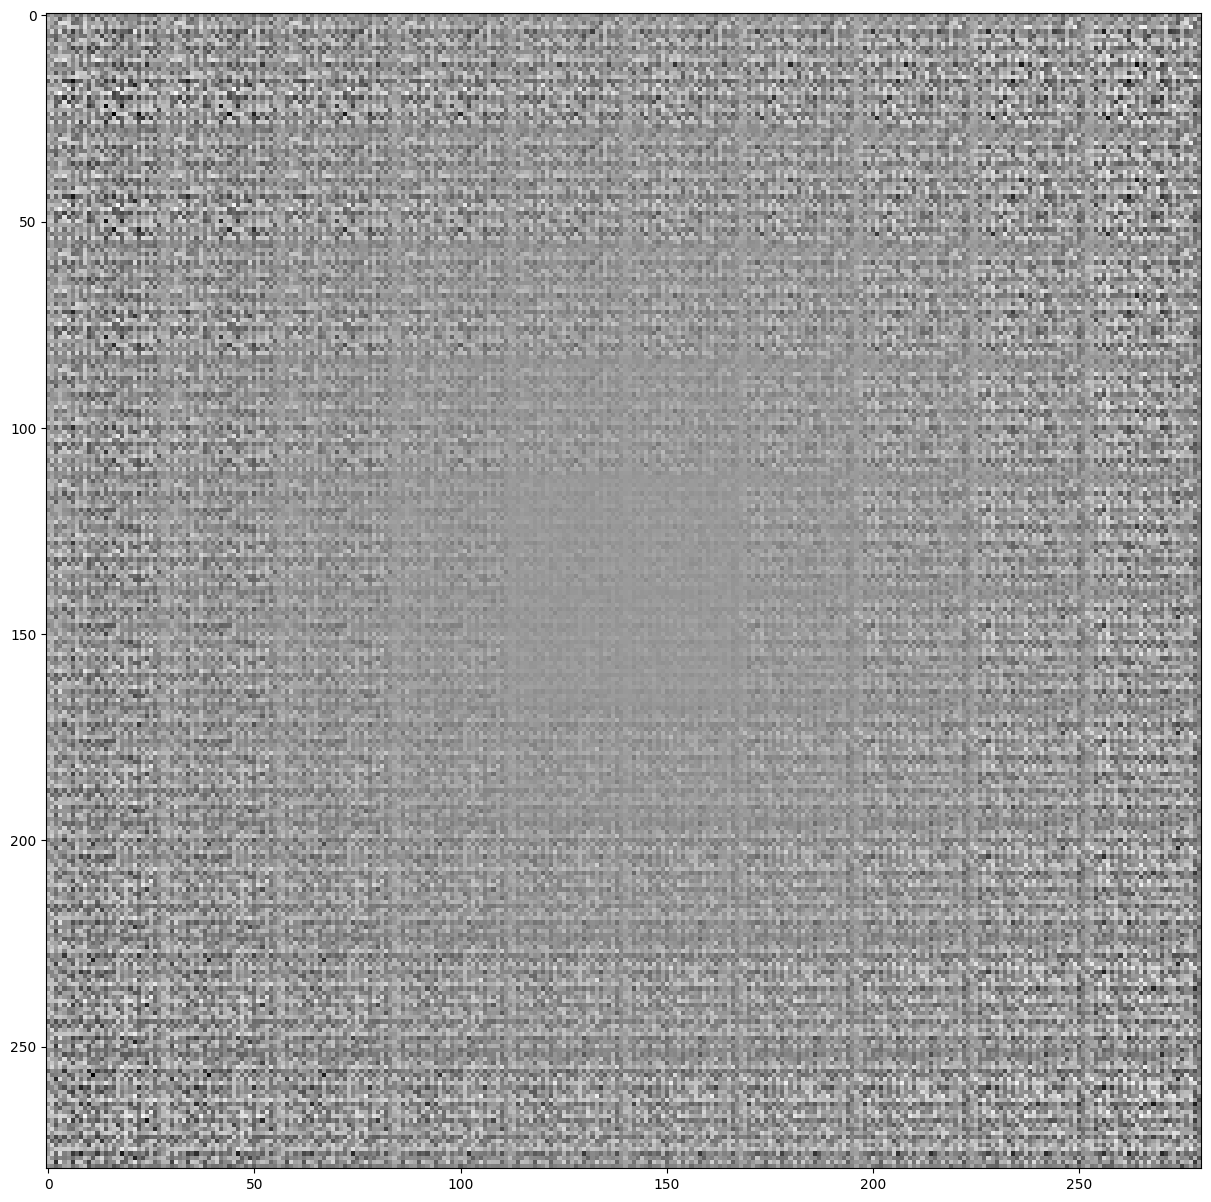

In [ ]:
# Generate images using the VAE
!pip install matplotlib
import matplotlib.pyplot as plt # Import the pyplot module from matplotlib
import numpy as np

def plot_latent_space(encoder, decoder, n=10, figsize=15):
 # Display a grid of images in the 2D latent space
 digit_size = 28
 scale = 1.0
 figure = np.zeros((digit_size * n, digit_size * n))
 grid_x = np.linspace(-scale, scale, n)
 grid_y = np.linspace(-scale, scale, n)[::-1]
 for i, yi in enumerate(grid_y):
    # Indent the code block within the for loop
    for j, xi in enumerate(grid_x):
        z_sample = np.array([[xi, yi]])
        x_decoded = decoder.predict(z_sample)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit
 plt.figure(figsize=(figsize, figsize)) # Now plt is recognized
 plt.imshow(figure, cmap='Greys_r')
 plt.show()
# Plot the generated images from the latent space
plot_latent_space(encoder, decoder)